In [24]:
import pandas as pd
import arff, numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Matplotlib is building the font cache; this may take a moment.


In [17]:
arff_file = arff.loadarff('dataset/Rice_Cammeo_Osmancik.arff')

In [20]:
df = pd.DataFrame(arff_file[0])
df['Class'] = df['Class'].apply(lambda x: 0 if x == b'Cammeo' else 1)

df.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


Accuracy: 0.8779527559055118
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       350
           1       0.88      0.90      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.88      0.88       762
weighted avg       0.88      0.88      0.88       762

Confusion Matrix:
[[298  52]
 [ 41 371]]


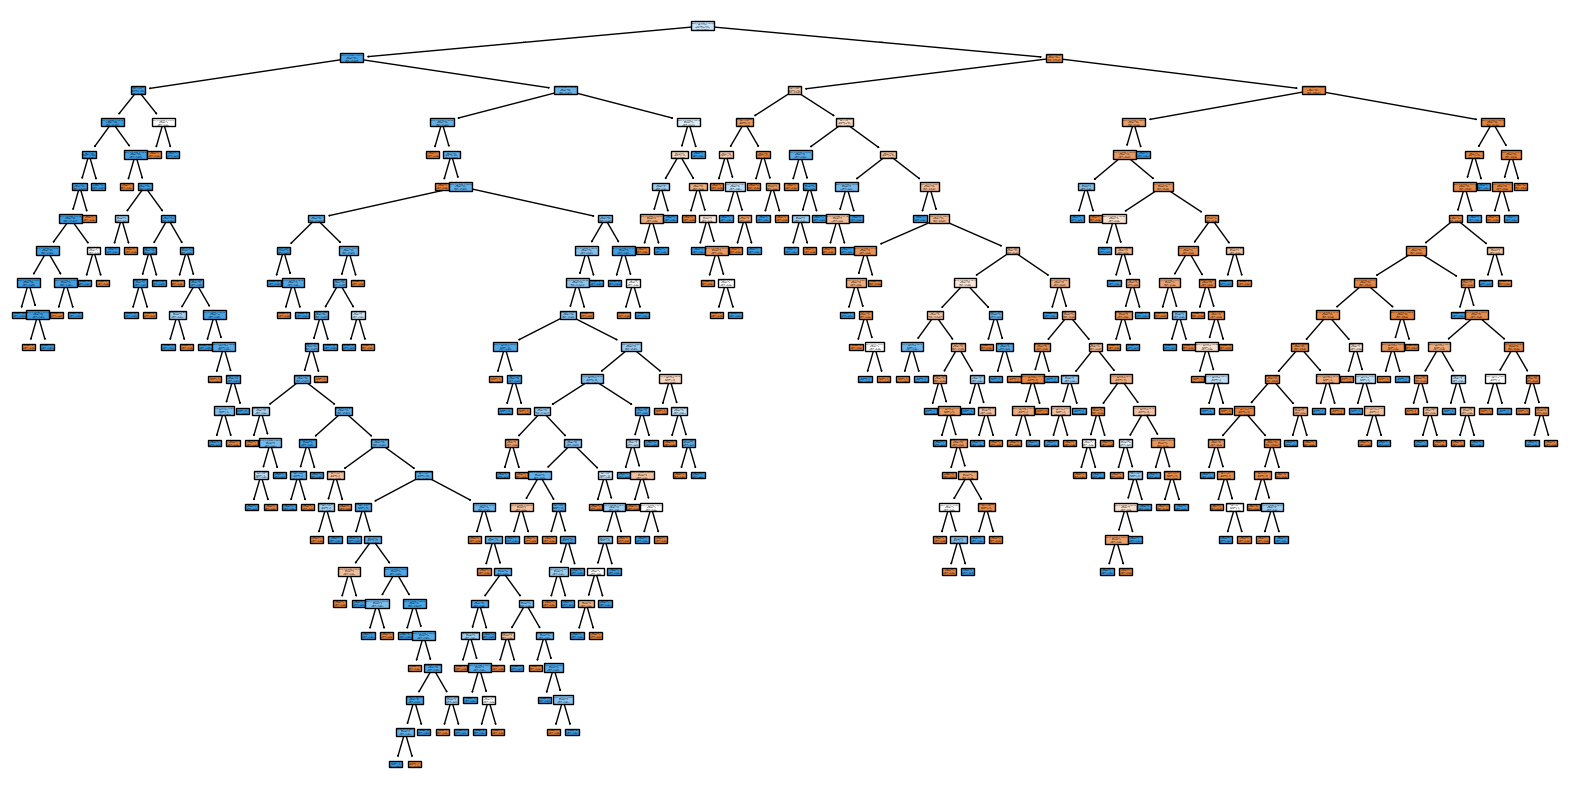

In [25]:
# Separare le caratteristiche e il target
X = df.drop('Class', axis=1)
y = df['Class']

# Dividere i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare e addestrare l'albero di decisione
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prevedere sul set di test
y_pred = clf.predict(X_test)

# Valutare il modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualizzare l'albero di decisione
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Cammeo', 'Osmancik'])
plt.show()